In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_camph_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Camphene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.222222
2,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.222222
3,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
4,5,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..Camphene'], axis = 1)
y = df_mlp[['X..Camphene']]

<AxesSubplot:ylabel='Count'>

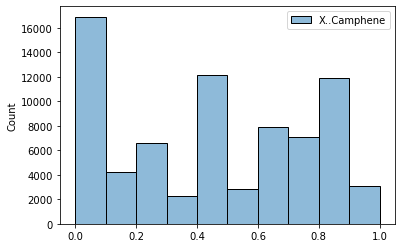

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.1559463179749972

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.681397894394203

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.5973106330539427

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([9.19244581e-02, 8.79790427e-02, 8.80580470e-02, 8.98030813e-02,
       9.19324300e-02, 3.36096483e-02, 2.15943632e-02, 2.94696399e-02,
       1.01580543e-04, 4.87076925e-03, 4.21834894e-03, 4.17767702e-07,
       5.85275388e-03, 9.58725399e-05, 4.02579132e-03, 5.04223041e-03,
       7.54081749e-03, 6.44176194e-03, 2.39739123e-06, 8.56863685e-03,
       1.00015525e-06, 1.59248834e-06, 6.59505037e-03, 5.26469651e-03,
       8.23216650e-03, 1.87779296e-03, 7.08875195e-03, 9.84069726e-05,
       5.39403195e-07, 3.13718332e-03, 8.19903672e-03, 1.93354157e-06,
       6.15851192e-03, 0.00000000e+00, 0.00000000e+00, 5.20876911e-03,
       5.74995630e-03, 7.87397692e-03, 1.88938947e-03, 1.27497624e-04,
       1.58734051e-04, 5.80690421e-03, 2.84292339e-04, 1.18980329e-02,
       1.31153400e-03, 4.75245649e-03, 1.87145234e-03, 2.84581013e-04,
       1.37531731e-02, 1.08886120e-03, 1.54574265e-01, 9.88387664e-03,
       2.95604229e-03, 2.08601572e-03, 5.97740561e-03, 1.27819347e-03,
      

In [16]:
selector.threshold_

0.011627906976744186

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,blueberry,citrus,diesel,mango
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,0,0
3,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,0,0
4,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0
74998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'blueberry',
 'citrus',
 'diesel',
 'mango']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_camph.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_camph.pkl")

['selected_X_mlp_lsa_elbow_camph.pkl']

In [23]:
# import joblib

# selected_X = joblib.load("selected_X_mlp_lsa_elbow_camph.pkl")

Train test split (after Feature Selection)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [25]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [26]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.21601828694639372

In [28]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.3796849488483539

In [29]:
#val
r2_score(y_val, y_pred_mlpreg)

0.36398377548617533

Hyperparameter Tuning

In [30]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [31]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [32]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [33]:
rscv.best_params_

{'max_iter': 200, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [34]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_camph.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_camph.pkl")

['rscv_mlp_lsa_elbow_best_params_camph.pkl']

MLP fit (after hyperparameter tuning)

In [35]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=200, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.17941933302440866

In [37]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.5871421016953142

In [38]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.5173641393321169

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [39]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [40]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_camph.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_camph.pkl")

['y_test_mlpreg_lsa_elbow_camph.pkl']

In [41]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.17902259977138912

In [42]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.053294466938542305

In [43]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.23085594412651

In [44]:
r2_score(y_test, y_pred_mlpreg_test)

0.5271147845830376

Error analysis

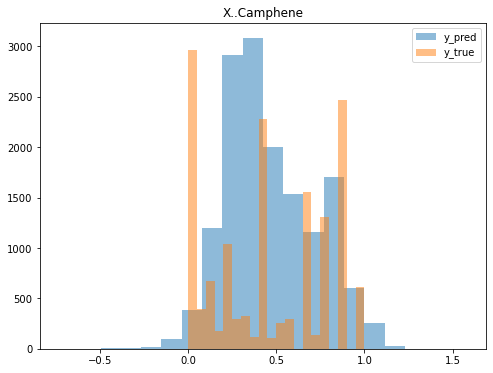

<Figure size 432x288 with 0 Axes>

In [45]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Camphene"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_camph.png')

Pearson R

In [46]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.727
P-value: 0.000


<AxesSubplot:>

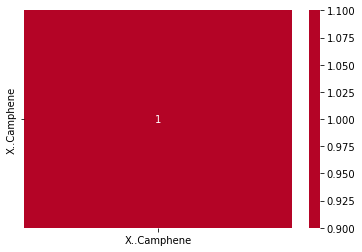

In [47]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)